In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow

In [51]:
import sklearn
from sklearn import preprocessing as pre

In [52]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Dense

In [53]:
df = pd.read_csv('Google_Stock_Price_Train.csv')

In [54]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [55]:
training_set = df.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [56]:
sc = pre.MinMaxScaler(feature_range=(0,1))
training_set = sc.fit_transform(training_set)

In [57]:
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [58]:
x_train = []
y_train = []

In [59]:
for i in range(60, len(training_set)):
    x_train.append(training_set[i-60:i, 0])
    y_train.append(training_set[i])

In [60]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [61]:
y_train

array([[0.08627874],
       [0.08471612],
       [0.07454052],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [62]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [63]:
regressor = Sequential()

In [64]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=((x_train.shape[1], 1))))
regressor.add(Dropout(0.2))

In [65]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [66]:
regressor.add(Dense(units=1))

In [67]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [68]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0568
Epoch 2/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0058
Epoch 5/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0059
Epoch 7/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0017
Epoch 98/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0015


In [69]:
realData = pd.read_csv('Google_Stock_Price_Test.csv')

In [70]:
realData.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [71]:
test_set = realData.iloc[:, 1:2].values
test_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [94]:
len(test_set)

20

In [72]:
dataset_total = pd.concat((df['Open'], realData['Open']), axis=0)

In [73]:
dataset_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [75]:
inputs = dataset_total[len(dataset_total)-len(test_set)-60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [77]:
inputs = inputs.reshape(-1, 1)

In [78]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [79]:
len(inputs)

80

In [80]:
inputs = sc.transform(inputs)

In [81]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [82]:
x_test = []
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])

In [84]:
x_test = np.array(x_test)

In [87]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [88]:
predictedValues = regressor.predict(x_test)

In [89]:
predictedValues = sc.inverse_transform(predictedValues)

In [91]:
predictedValues

array([[788.2233 ],
       [785.72156],
       [785.09393],
       [785.7071 ],
       [788.18317],
       [793.08734],
       [798.4591 ],
       [801.8973 ],
       [803.5002 ],
       [803.96265],
       [803.87317],
       [803.48047],
       [803.02106],
       [803.0618 ],
       [803.5892 ],
       [806.9141 ],
       [812.686  ],
       [819.712  ],
       [824.9049 ],
       [823.9093 ]], dtype=float32)

[]

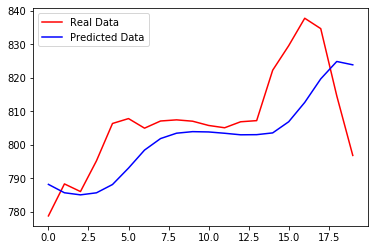

In [97]:
plt.plot(test_set, color='red', label='Real Data')
plt.plot(predictedValues, color='blue', label='Predicted Data')
plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.plot()

In [95]:
len(predictedValues)

20